In [5]:
import pandas as pd
df = pd.read_csv("E:\ETL HIVE\Python\Datasets\covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [7]:
print(df.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [9]:
print(df.shape)

(306429, 8)


In [11]:
print(df.columns)

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None


In [15]:
print(df.describe())

                 SNo     Confirmed         Deaths     Recovered
count  306429.000000  3.064290e+05  306429.000000  3.064290e+05
mean   153215.000000  8.567091e+04    2036.403268  5.042029e+04
std     88458.577156  2.775516e+05    6410.938048  2.015124e+05
min         1.000000 -3.028440e+05    -178.000000 -8.544050e+05
25%     76608.000000  1.042000e+03      13.000000  1.100000e+01
50%    153215.000000  1.037500e+04     192.000000  1.751000e+03
75%    229822.000000  5.075200e+04    1322.000000  2.027000e+04
max    306429.000000  5.863138e+06  112385.000000  6.399531e+06


In [17]:
print(df.isnull().sum())

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [19]:
df = df.dropna()

In [21]:
df = df.dropna(axis=1)

In [23]:
df = df.dropna(how='all')

In [25]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [SNo, ObservationDate, Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered]
Index: []


In [26]:
df = df.drop_duplicates()

In [28]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

num_duplicates = df.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [29]:
numeric_summary = df.describe()
print("\nDescriptive Statistics for Numeric Columns:")
print(numeric_summary)


Descriptive Statistics for Numeric Columns:
                 SNo                ObservationDate     Confirmed  \
count  228326.000000                         228326  2.283260e+05   
mean   158732.777113  2020-11-14 03:17:45.686780928  8.021381e+04   
min         1.000000            2020-01-22 00:00:00 -3.028440e+05   
25%     85431.250000            2020-08-11 00:00:00  1.225000e+03   
50%    159305.500000            2020-11-18 00:00:00  1.175750e+04   
75%    232835.750000            2021-02-22 00:00:00  4.841125e+04   
max    306429.000000            2021-05-29 00:00:00  5.713215e+06   
std     85862.065298                            NaN  2.493661e+05   

              Deaths     Recovered  
count  228326.000000  2.283260e+05  
mean     1961.373273  4.184345e+04  
min      -178.000000 -8.544050e+05  
25%        15.000000  0.000000e+00  
50%       234.000000  1.211000e+03  
75%      1411.000000  1.660275e+04  
max    112385.000000  6.399531e+06  
std      5871.937048  1.793670e+05  


In [31]:
categorical_summary = df.describe(include=['object', 'category'])
print("\nSummary Statistics for Categorical Columns:")
print(categorical_summary)


Summary Statistics for Categorical Columns:
       Province/State Country/Region          Last Update
count          228326         228326               228326
unique            736             29                 1369
top           Unknown         Russia  2021-04-02 15:13:53
freq             4123          30129               183160


In [32]:
df_time = df.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()


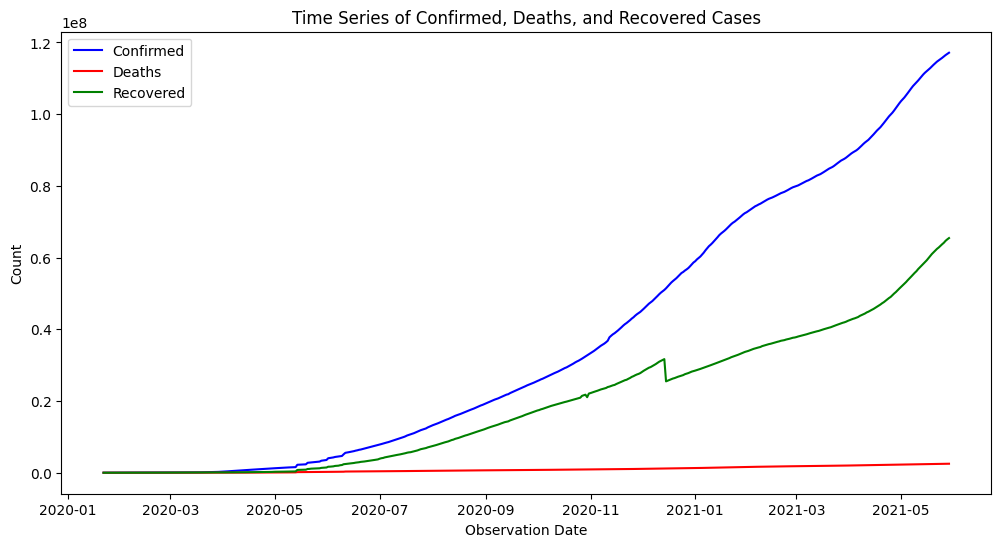

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed', color='blue')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered', color='green')

plt.xlabel('Observation Date')
plt.ylabel('Count')
plt.title('Time Series of Confirmed, Deaths, and Recovered Cases')
plt.legend()
plt.show()


In [36]:
df_country = df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()


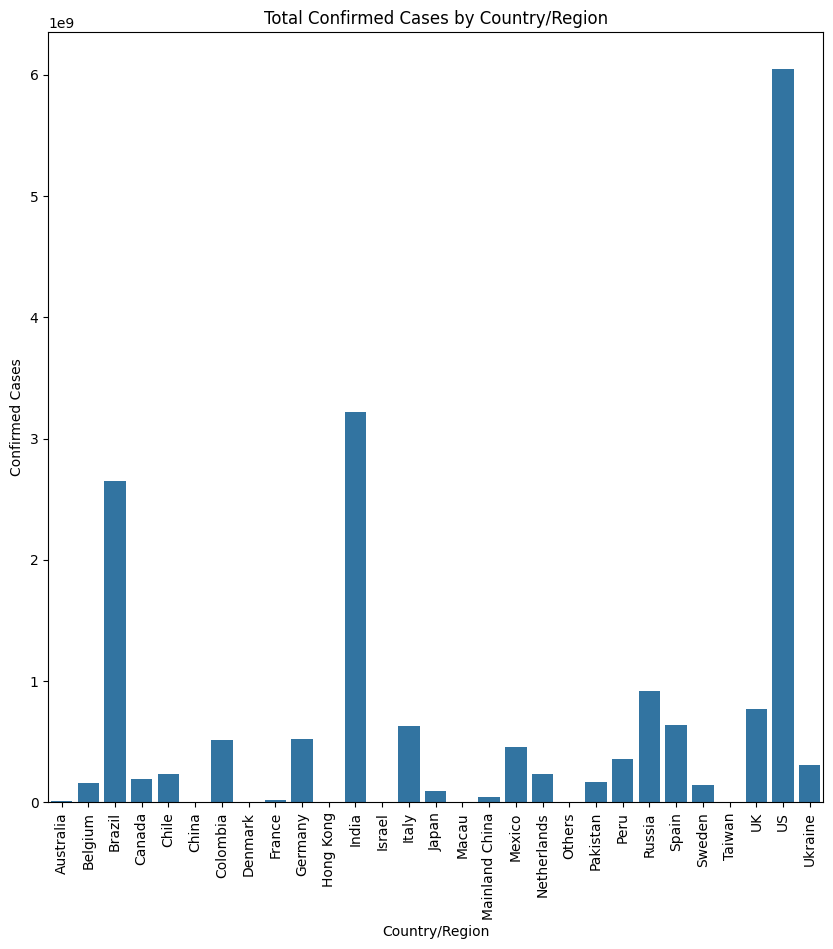

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10)) 
sns.barplot(x='Country/Region', y='Confirmed', data=df_country)

plt.xticks(rotation=90)  
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title('Total Confirmed Cases by Country/Region')
plt.show()


In [40]:
correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()


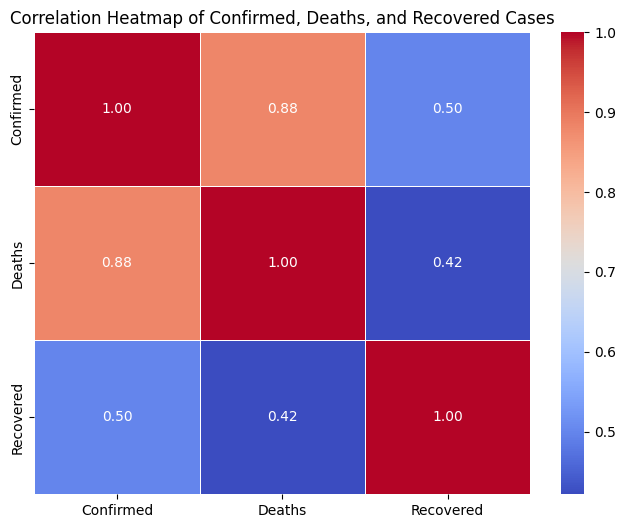

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Confirmed, Deaths, and Recovered Cases')
plt.show()


In [42]:
df_country_totals = df.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()


print(df_country_totals)

    Country/Region     Confirmed       Deaths     Recovered
0        Australia  9.447430e+06     268435.0  7.219933e+06
1          Belgium  1.547341e+08    4219275.0  0.000000e+00
2           Brazil  2.649295e+09   72339029.0  2.311993e+09
3           Canada  1.934975e+08    5692896.0  1.715769e+08
4            Chile  2.315812e+08    5707664.0  2.166768e+08
5            China  0.000000e+00          0.0  0.000000e+00
6         Colombia  5.148170e+08   13962927.0  4.686380e+08
7          Denmark  2.122260e+05        186.0  1.929090e+05
8           France  1.918464e+07     157809.0  9.383745e+06
9          Germany  5.174361e+08   13150115.0  4.493167e+08
10       Hong Kong  2.655935e+06      45325.0  2.433578e+06
11           India  3.221090e+09   44256013.0  2.898258e+09
12          Israel  5.000000e+00          0.0  0.000000e+00
13           Italy  6.277543e+08   24852224.0  4.851544e+08
14           Japan  8.866606e+07    1555677.0  7.805405e+07
15           Macau  2.060500e+04        

In [43]:
top_confirmed = df_country_totals.sort_values(by='Confirmed', ascending=False)
print("Top countries/regions by confirmed cases:")
print(top_confirmed.head())   

top_deaths = df_country_totals.sort_values(by='Deaths', ascending=False)
print("\nTop countries/regions by deaths:")
print(top_deaths.head()) 

top_recovered = df_country_totals.sort_values(by='Recovered', ascending=False)
print("\nTop countries/regions by recoveries:")
print(top_recovered.head()) 

Top countries/regions by confirmed cases:
   Country/Region     Confirmed       Deaths     Recovered
27             US  6.049146e+09  123303762.0  5.033710e+08
11          India  3.221090e+09   44256013.0  2.898258e+09
2          Brazil  2.649295e+09   72339029.0  2.311993e+09
22         Russia  9.211500e+08   18271229.0  7.883275e+08
26             UK  7.705376e+08   27316263.0  2.323781e+06

Top countries/regions by deaths:
   Country/Region     Confirmed       Deaths     Recovered
27             US  6.049146e+09  123303762.0  5.033710e+08
2          Brazil  2.649295e+09   72339029.0  2.311993e+09
11          India  3.221090e+09   44256013.0  2.898258e+09
17         Mexico  4.595573e+08   42918161.0  3.612402e+08
26             UK  7.705376e+08   27316263.0  2.323781e+06

Top countries/regions by recoveries:
   Country/Region     Confirmed       Deaths     Recovered
11          India  3.221090e+09   44256013.0  2.898258e+09
2          Brazil  2.649295e+09   72339029.0  2.311993e+09
2

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5996\3868057494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Deaths', data=df_country_totals, palette='viridis')


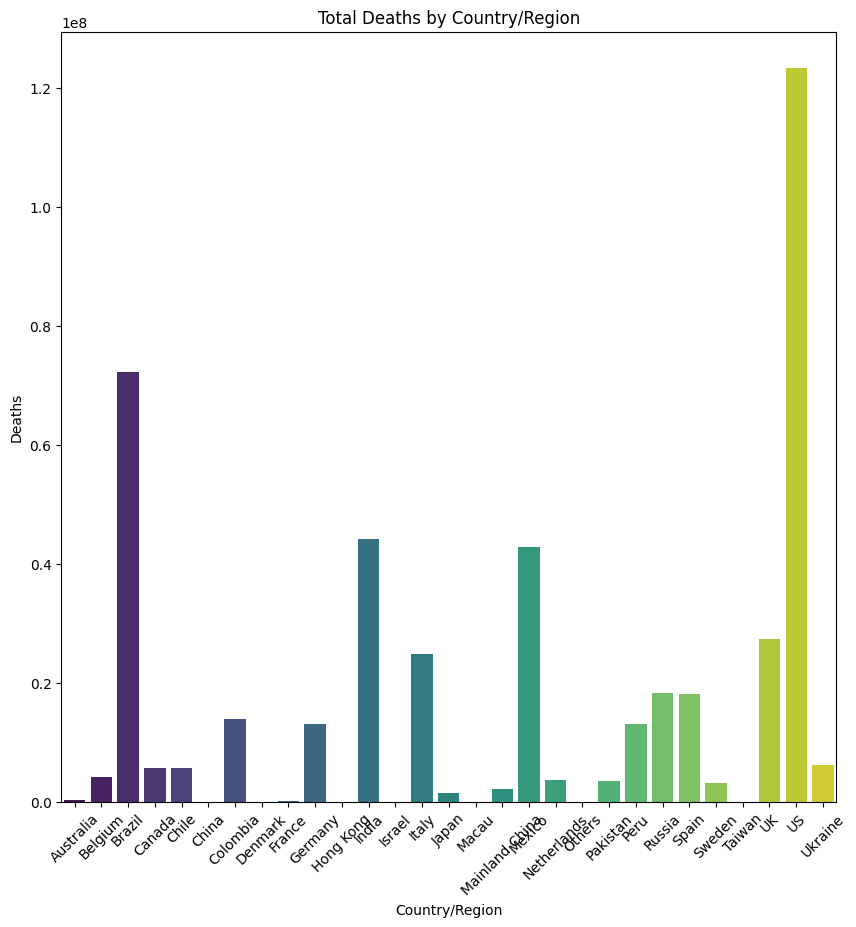

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))  

sns.barplot(x='Country/Region', y='Deaths', data=df_country_totals, palette='viridis')

plt.xticks(rotation=45)

plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.title('Total Deaths by Country/Region')

plt.show()
